In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Show the first few rows of the dataset
print(train_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Fill missing 'Age' values with the median of the dataset
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


In [4]:

# Fill missing 'Embarked' values with the most common port (mode)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


In [5]:

# Drop 'Cabin' as it has too many missing values and also drop 'Ticket' and 'Name' as they are not useful for the model
train_data = train_data.drop(['Cabin', 'Ticket', 'Name'], axis=1)


In [6]:

# Convert 'Sex' to numeric: male = 1, female = 0
train_data['Sex'] = train_data['Sex'].map({'male': 1, 'female': 0})


In [7]:

# Convert 'Embarked' to numeric
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [8]:

# Create a new feature 'FamilySize' by adding 'SibSp' and 'Parch'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1


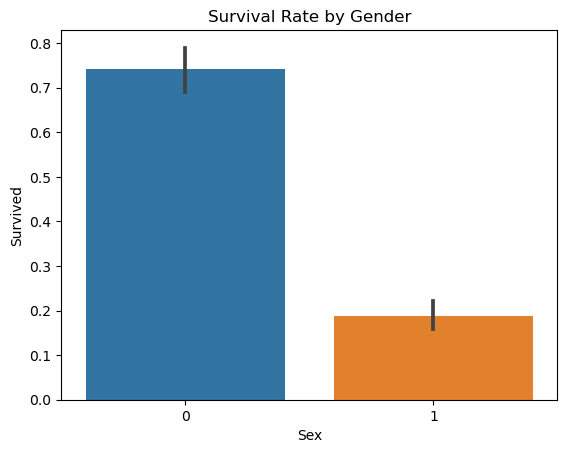

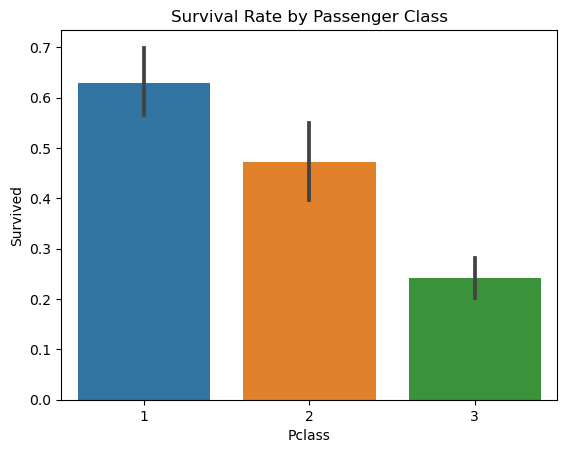

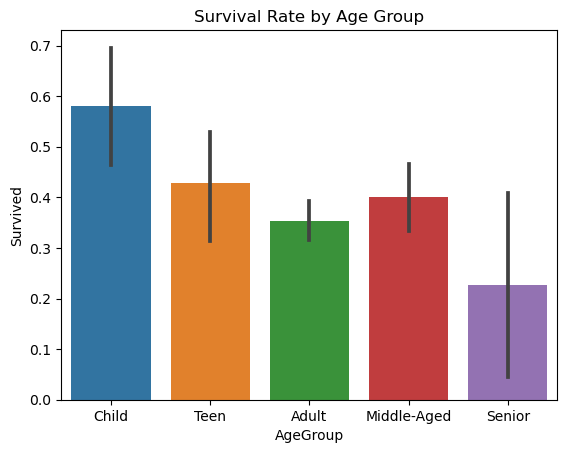

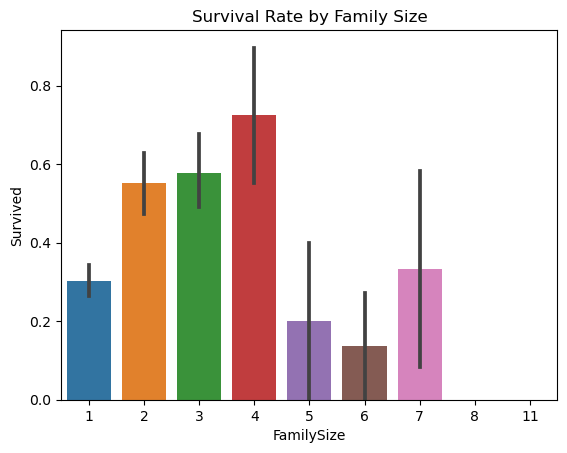

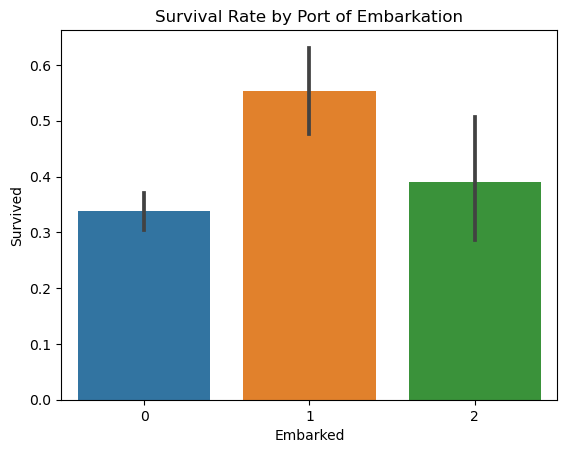

In [9]:
# Visualize survival rate based on gender
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.show()

# Visualize survival rate based on Passenger Class
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Visualize survival rate based on Age Groups
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])
sns.barplot(x='AgeGroup', y='Survived', data=train_data)
plt.title('Survival Rate by Age Group')
plt.show()

# Survival rate by Family Size
sns.barplot(x='FamilySize', y='Survived', data=train_data)
plt.title('Survival Rate by Family Size')
plt.show()

# Survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title('Survival Rate by Port of Embarkation')
plt.show()


In [10]:
# Separate features and target variable (Survived)
X = train_data.drop(['PassengerId', 'Survived', 'AgeGroup'], axis=1)  # Drop 'AgeGroup' as it's used for visualization, not the model
y = train_data['Survived']

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initialize a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report for more details
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



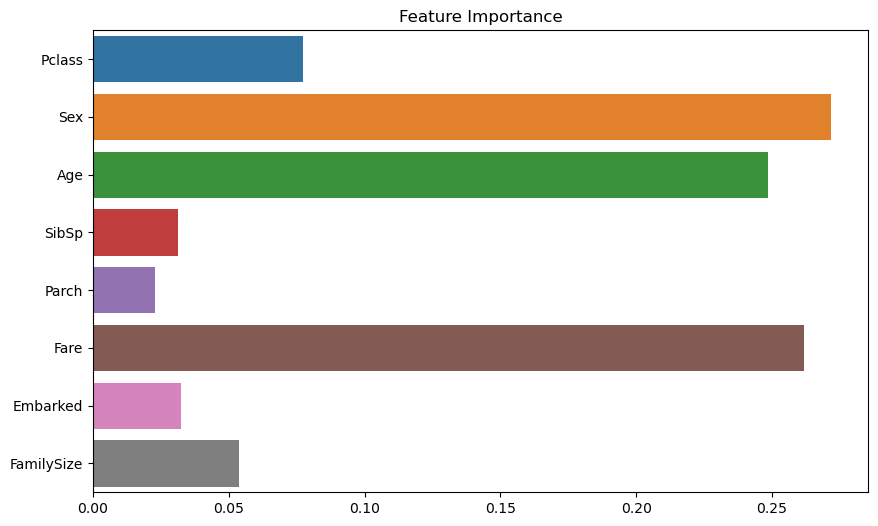

In [13]:
# Get the feature importance from the trained model
importance = model.feature_importances_

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance')
plt.show()


## Conclusion: 

Gender: Females had a higher survival rate than males.
Passenger Class: People in 1st class had a higher survival rate compared to those in 2nd and 3rd class.
Age: Children and young adults had better chances of survival.
Family Size: Passengers with smaller family sizes (1 or 2 people) were more likely to survive.
Embarked: People who embarked from certain ports (e.g., Cherbourg) had better survival rates.